In [ ]:
#import all the necessary packages
import numpy as np #for numerical array data
import pandas as pd #for tabular data
import matplotlib.pyplot as plt #for plotting purposes

%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import importlib as imp
import warnings
warnings.filterwarnings('ignore')

In [ ]:
all_data = pd.read_csv("Data_Oct2018.csv")
#all_data['Date'] = pd.to_datetime(all_data['Date'])

In [ ]:
all_data.head(20)

,Date,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,US Equities,Real Estate,Commodities,Corp Bonds
0,1/1/1985,0.028511,0.031500,0.006408,-0.016265,0.030292,0.081301,0.056605,0.021351,0.048963
1,2/1/1985,-0.009204,-0.044692,0.057381,0.006362,0.010258,0.030075,0.016448,-0.015217,-0.042029
2,3/1/1985,0.075134,0.028719,-0.024396,-0.002848,-0.020739,-0.007299,-0.006716,0.037171,0.032666
3,4/1/1985,-0.002459,0.023084,-0.004869,0.003089,0.008187,-0.012255,0.000906,-0.035116,0.037125
4,5/1/1985,0.040245,0.086780,-0.044417,0.004077,-0.002219,0.064516,0.027241,0.004351,0.104199
5,6/1/1985,0.022419,0.014284,-0.001572,0.027610,-0.017278,0.020979,0.023207,-0.046275,0.012482
6,7/1/1985,0.048480,-0.014958,0.023357,-0.010178,0.000007,0.004566,0.009221,-0.006240,-0.006449
7,8/1/1985,0.027709,0.021934,-0.001815,0.016312,0.011122,-0.009091,-0.054684,0.014064,0.037397
8,9/1/1985,0.048713,0.002172,0.007427,-0.004868,-0.034424,-0.027523,-0.031145,0.060092,0.000941
9,10/1/1985,0.058439,0.033903,-0.031340,0.026578,-0.007977,0.037736,0.031415,0.075345,0.037840


# Linear Regression-OLS Model via Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# STEP1=CREATE FEATURES AND LABEL

In [ ]:
x=all_data.drop(['Date','US Equities','Real Estate','Commodities','Corp Bonds'],axis=1)
x.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


In [ ]:
y=all_data['Real Estate']
y.head()

0    0.056605
1    0.016448
2   -0.006716
3    0.000906
4    0.027241
Name: Real Estate, dtype: float64

#SCALE ALL VALUES BETWEEN 0 AND 1
#HERE WE ARE TRYING TO CONVERT UNSTANDARDIZED COEFFICIENTS TO STANDARDIZED COEFFICIENTS AND ALSO LIMITING COEFFICIENTS VALUES BETWEEN 0 AND 1

In [ ]:
#SCALE ALL VALUES BETWEEN 0 AND 1
#HERE WE ARE TRYING TO CONVERT UNSTANDARDIZED COEFFICIENTS TO STANDARDIZED COEFFICIENTS AND ALSO LIMITING COEFFICIENTS VALUES BETWEEN 0 AND 1
import sklearn
from sklearn.preprocessing import MinMaxScaler
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()
x_scld.describe()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.650879,0.496695,0.580558,0.428702,0.639215
1,0.545729,0.185428,0.696311,0.573976,0.441334
2,0.780865,0.485334,0.510606,0.514844,0.135170
3,0.564534,0.462313,0.554949,0.552962,0.420878
4,0.683594,0.722530,0.465141,0.559305,0.318096


,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
count,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.594987,0.397949,0.566200,0.537600,0.356435
std,0.139487,0.123428,0.087614,0.108722,0.125634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.514679,0.321746,0.525678,0.485310,0.269500
50%,0.599878,0.401099,0.567092,0.541026,0.358079
75%,0.681199,0.464748,0.612464,0.583670,0.427546
max,1.000000,1.000000,1.000000,1.000000,1.000000


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f792a324050>)

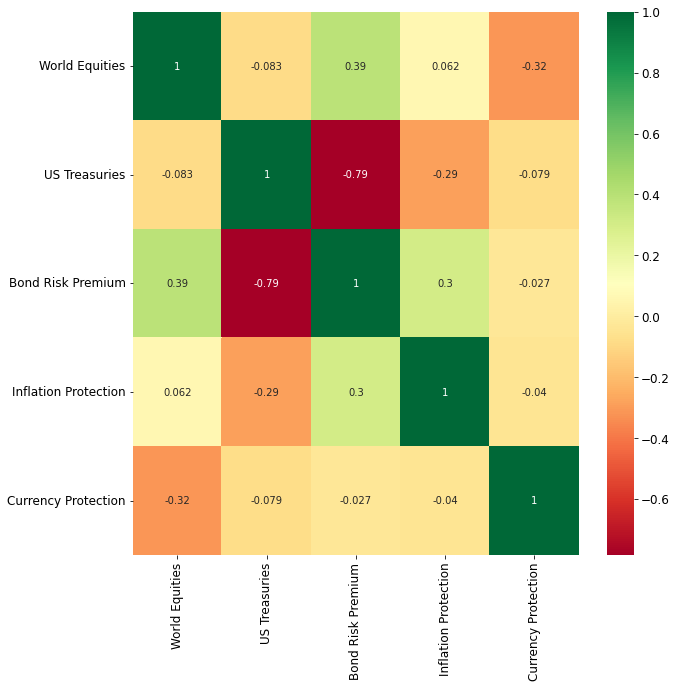

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(10,10))
sns.heatmap(x_scld.corr(),cmap='RdYlGn',annot=True)
plt.show()

# STEP2 SPLIT TEST AND TRAIN

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(324, 5)

(81, 5)

(324,)

(81,)

#STEP 3:CREATE INSTANT OF THE MODEL

In [ ]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# STEP 4:FIT THE MODEL

In [ ]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# STEP5 PREDICT USING THE TRAINED MODEL

In [ ]:
predicted_values=lm.predict(test_x)
predicted_values

array([ 2.24451022e-02, -5.32572233e-03, -4.80351397e-02,  9.88058212e-03,
       -1.90063565e-02,  9.14970977e-02,  1.88799910e-02,  5.96549698e-02,
        1.13500481e-02, -2.82338165e-02,  9.86612248e-03, -7.18483438e-04,
        2.96256664e-02,  2.74693801e-02, -1.92683540e-02,  1.84218690e-02,
       -6.71907151e-02,  2.02362171e-02, -5.44873231e-03,  4.10394589e-02,
        1.10202712e-02, -8.97072975e-03,  2.75162319e-03,  1.02237949e-02,
        3.13356510e-02,  2.82016731e-02,  3.83940589e-03,  3.30922407e-03,
        2.21771265e-02,  1.31841179e-02, -6.38427660e-03,  6.44018261e-02,
        2.45291071e-03,  2.81128499e-02,  1.19098843e-02,  1.61725313e-02,
        1.76903791e-02,  6.18477233e-03,  1.98179749e-02, -2.94035401e-02,
        1.94086348e-02, -1.44870505e-02, -2.94960832e-02,  4.88636998e-04,
        1.83846190e-02,  5.23109670e-03,  1.10037634e-02,  1.43565599e-02,
        3.55030618e-02,  9.54630830e-03, -1.59126996e-02,  1.10324486e-01,
       -7.58559165e-02,  

# #STEP6-EVALUATE MODEL PERFORMANCE for Linear Regression-OLS Model without Noise

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),5)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.03466

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00363

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02454

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lm.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

44.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lm.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

38.0

In [ ]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})

[0.09863633 0.2577528  0.35854765 0.03592711 0.02177413]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

# coef_ for Linear Regression-OLS Model without Noise

In [ ]:
df_m

,features,coeff
4,Currency Protection,0.021774
3,Inflation Protection,0.035927
0,World Equities,0.098636
1,US Treasuries,0.257753
2,Bond Risk Premium,0.358548


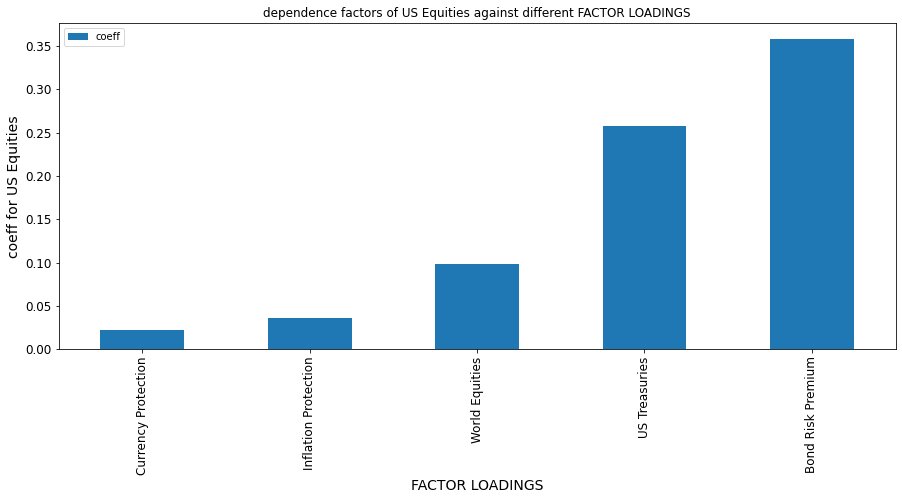

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['Real Estate']-fdf['Predicted']
fdf.head(5)

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Real Estate,Predicted,Prediction_Error
361,0.709938,0.142291,0.746212,0.554271,0.520480,-0.019236,0.02245,-0.041686
62,0.294506,0.361410,0.629166,0.591221,0.399514,0.001661,-0.00533,0.006991
320,0.236217,0.717142,0.290261,0.373403,0.431131,-0.131199,-0.04804,-0.083159
92,0.510168,0.428393,0.555556,0.582014,0.555337,0.023854,0.00988,0.013974
146,0.574908,0.274209,0.584328,0.503249,0.416740,-0.009247,-0.01901,0.009763


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7927fdbc90>)

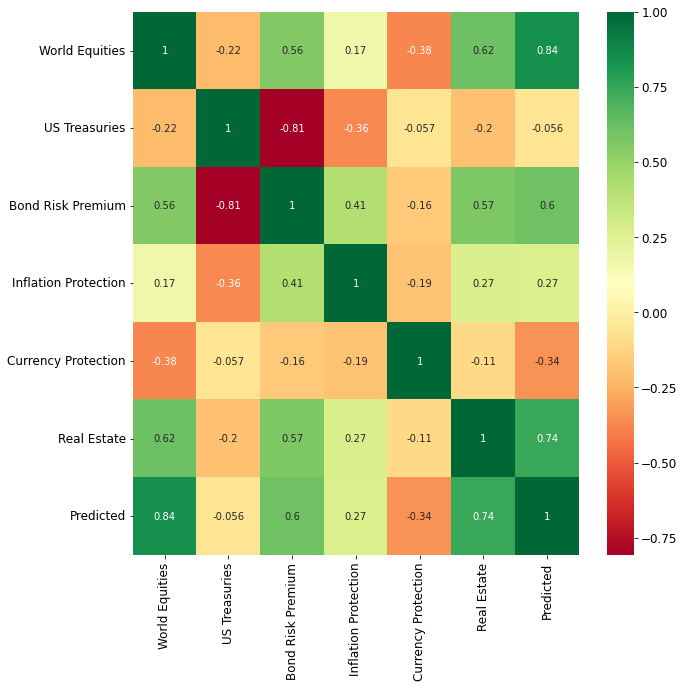

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

we will plot the actual US Equities values from our dataset against the predicted values. This will tell us how accurate our model is. we will  be using a scatter plot. 

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7926bf1750>)

Text(0.5, 1.0, 'Predicted vs Actual Real Estate Returns')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted Real Estate Returns')

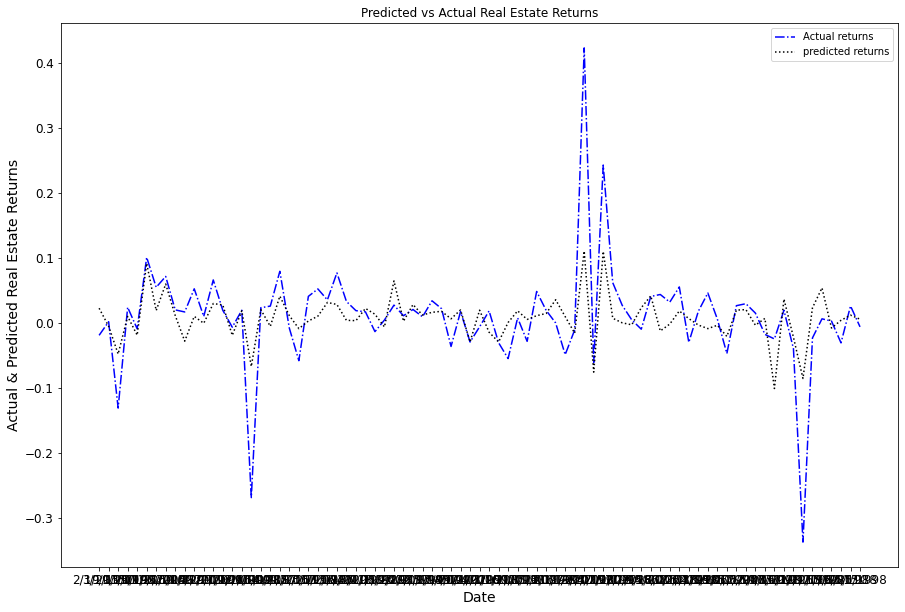

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['Real Estate'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual Real Estate Returns')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted Real Estate Returns')
plt.show()

#Calculate a noise variable and add as independent variable

In [ ]:
#Calculate a noise variable
std = all_data['Real Estate'].std()*(2)
nPeriods = all_data.shape[0]
np.random.seed(1245)
noise = np.random.normal(loc=0, size=(nPeriods))
noise = np.reshape(std*noise + np.array(all_data['World Equities']), (nPeriods,1))

# Linear Regression-OLS Model via Scikit-learn along with Noise

In [ ]:
x['Noise'] = noise
x.head(5)
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise
0,0.028511,0.031500,0.006408,-0.016265,0.030292,0.119571
1,-0.009204,-0.044692,0.057381,0.006362,0.010258,-0.049999
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739,0.113697
3,-0.002459,0.023084,-0.004869,0.003089,0.008187,0.143905
4,0.040245,0.086780,-0.044417,0.004077,-0.002219,0.117088


,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Noise
0,0.650879,0.496695,0.580558,0.428702,0.639215,0.624989
1,0.545729,0.185428,0.696311,0.573976,0.441334,0.420526
2,0.780865,0.485334,0.510606,0.514844,0.135170,0.617907
3,0.564534,0.462313,0.554949,0.552962,0.420878,0.654330
4,0.683594,0.722530,0.465141,0.559305,0.318096,0.621995


In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)

In [ ]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predicted_values=lm.predict(test_x)
predicted_values

array([ 0.02088195, -0.00491712, -0.04684171,  0.00862133, -0.0193112 ,
        0.09245891,  0.01848758,  0.05997395,  0.01158036, -0.02926071,
        0.00873171, -0.00016271,  0.02932094,  0.02836842, -0.01992999,
        0.01856861, -0.06784097,  0.02271075, -0.00497023,  0.04123966,
        0.01024645, -0.0081076 ,  0.00396163,  0.01034409,  0.03126856,
        0.02729906,  0.00486975,  0.0045971 ,  0.0231948 ,  0.01409589,
       -0.00528803,  0.06408035,  0.00057573,  0.02553819,  0.01351217,
        0.01759352,  0.01796498,  0.00706535,  0.02244795, -0.02906896,
        0.02063512, -0.0146485 , -0.03023898,  0.00033165,  0.02069605,
        0.00624888,  0.01134099,  0.01355686,  0.03481124,  0.00942878,
       -0.01619307,  0.11087776, -0.07780303,  0.11174445,  0.00680735,
       -0.00057574, -0.00459711,  0.02373171,  0.04217948, -0.01216908,
       -0.00209134,  0.017839  ,  0.00562498, -0.0043021 , -0.00922166,
       -0.00327892, -0.01994485,  0.01959604,  0.01953532, -0.00

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),5)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.03477

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00362

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02579

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lm.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

45.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lm.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

38.0

In [ ]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lm.coef_})

[ 0.10214286  0.25940918  0.36061546  0.03548963  0.02109103 -0.00733093]


# coef_ for Linear Regression-OLS Model with Noise

In [ ]:
df_m=df_m.sort_values(by=['coeff'])

In [ ]:
df_m

,features,coeff
5,Noise,-0.007331
4,Currency Protection,0.021091
3,Inflation Protection,0.035490
0,World Equities,0.102143
1,US Treasuries,0.259409
2,Bond Risk Premium,0.360615


# Lasso Regression via Scikit-learn along with Noise

In [ ]:
from sklearn.linear_model import Lasso
lambda1 =0.1

In [ ]:
lassoReg = Lasso(alpha=lambda1/(2*all_data.shape[0]), fit_intercept=True)

In [ ]:
lassoReg.fit(train_x,train_y)

Lasso(alpha=0.0001234567901234568, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predicted_values=lassoReg.predict(test_x)
predicted_values

array([ 0.02051795, -0.01079868, -0.04407298,  0.00623772, -0.01427541,
        0.08329717,  0.02096198,  0.05138324,  0.00692463, -0.0255555 ,
        0.00715166, -0.000157  ,  0.02750368,  0.02720168, -0.01643417,
        0.01562942, -0.06082896,  0.01930488, -0.0022129 ,  0.03696633,
        0.01014439, -0.00611607,  0.00288957,  0.00912451,  0.03222674,
        0.02677378,  0.00299177,  0.00023288,  0.02092236,  0.01496434,
       -0.00772563,  0.05571216,  0.00128016,  0.02980266,  0.01391855,
        0.01257725,  0.01830098,  0.00853951,  0.01833427, -0.02396413,
        0.01836229, -0.01497705, -0.02392694,  0.00196359,  0.01590711,
        0.00495362,  0.01106546,  0.01257196,  0.0324427 ,  0.01169131,
       -0.0121096 ,  0.09566591, -0.06589277,  0.09595125,  0.00669412,
        0.0015089 ,  0.00361151,  0.02152706,  0.03781027, -0.00845272,
       -0.00244984,  0.01867504,  0.00897368, -0.00247139, -0.0062298 ,
       -0.00072395, -0.02237796,  0.0187695 ,  0.01678017, -0.00

# EVALUATE MODEL PERFORMANCE for Lasso Regression  along with Noise

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.035

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.0039

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02454

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lassoReg.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

40.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lassoReg.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

37.0

In [ ]:
print(lm.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoReg.coef_})

[ 0.10214286  0.25940918  0.36061546  0.03548963  0.02109103 -0.00733093]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

# lassoReg.coef_ for Lasso Regression with Noise

In [ ]:
df_m

,features,coeff
5,Noise,-0.000000
4,Currency Protection,0.011845
3,Inflation Protection,0.025961
0,World Equities,0.103431
1,US Treasuries,0.204767
2,Bond Risk Premium,0.279746


In [ ]:
x['Noise'] = noise
x=x.drop(['Noise'],axis=1)
x.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


# Lasso Regression via Scikit-learn without Noise

In [ ]:
arr_scld=scld.fit_transform(x)
x_scld=pd.DataFrame(arr_scld,columns=x.columns)
x_scld.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.650879,0.496695,0.580558,0.428702,0.639215
1,0.545729,0.185428,0.696311,0.573976,0.441334
2,0.780865,0.485334,0.510606,0.514844,0.135170
3,0.564534,0.462313,0.554949,0.552962,0.420878
4,0.683594,0.722530,0.465141,0.559305,0.318096


In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_scld,y,test_size=0.20,random_state=1)

In [ ]:
from sklearn.linear_model import Lasso
lambda1 =0.1

In [ ]:
lassoReg = Lasso(alpha=lambda1/(2*all_data.shape[0]), fit_intercept=True)

In [ ]:
lassoReg.fit(train_x,train_y)

Lasso(alpha=0.0001234567901234568, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
predicted_values=lassoReg.predict(test_x)
predicted_values

array([ 0.02051795, -0.01079868, -0.04407298,  0.00623772, -0.01427541,
        0.08329717,  0.02096198,  0.05138324,  0.00692463, -0.0255555 ,
        0.00715166, -0.000157  ,  0.02750368,  0.02720168, -0.01643417,
        0.01562942, -0.06082896,  0.01930488, -0.0022129 ,  0.03696633,
        0.01014439, -0.00611607,  0.00288957,  0.00912451,  0.03222674,
        0.02677378,  0.00299177,  0.00023288,  0.02092236,  0.01496434,
       -0.00772563,  0.05571216,  0.00128016,  0.02980266,  0.01391855,
        0.01257725,  0.01830098,  0.00853951,  0.01833427, -0.02396413,
        0.01836229, -0.01497705, -0.02392694,  0.00196359,  0.01590711,
        0.00495362,  0.01106546,  0.01257196,  0.0324427 ,  0.01169131,
       -0.0121096 ,  0.09566591, -0.06589277,  0.09595125,  0.00669412,
        0.0015089 ,  0.00361151,  0.02152706,  0.03781027, -0.00845272,
       -0.00244984,  0.01867504,  0.00897368, -0.00247139, -0.0062298 ,
       -0.00072395, -0.02237796,  0.0187695 ,  0.01678017, -0.00

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['Real Estate']-fdf['Predicted']
fdf.head(5)

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Real Estate,Predicted,Prediction_Error
361,0.709938,0.142291,0.746212,0.554271,0.520480,-0.019236,0.02052,-0.039756
62,0.294506,0.361410,0.629166,0.591221,0.399514,0.001661,-0.01080,0.012461
320,0.236217,0.717142,0.290261,0.373403,0.431131,-0.131199,-0.04407,-0.087129
92,0.510168,0.428393,0.555556,0.582014,0.555337,0.023854,0.00624,0.017614
146,0.574908,0.274209,0.584328,0.503249,0.416740,-0.009247,-0.01428,0.005033


we will plot the actual US Equities values from our dataset against the predicted values. This will tell us how accurate our model is. we will  be using a scatter plot. 

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7925203b90>)

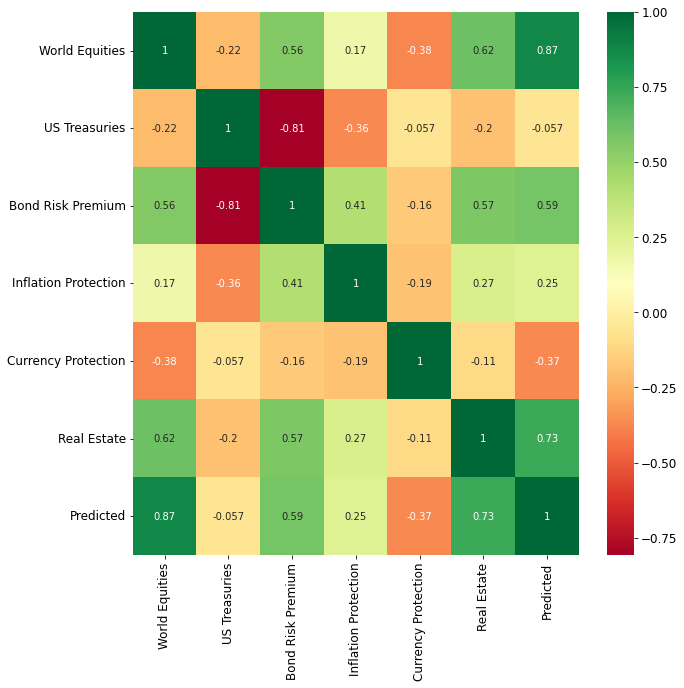

In [ ]:
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f79281b2290>)

Text(0.5, 1.0, 'Predicted vs Actual Real Estate Returns')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted Real Estate Returns')

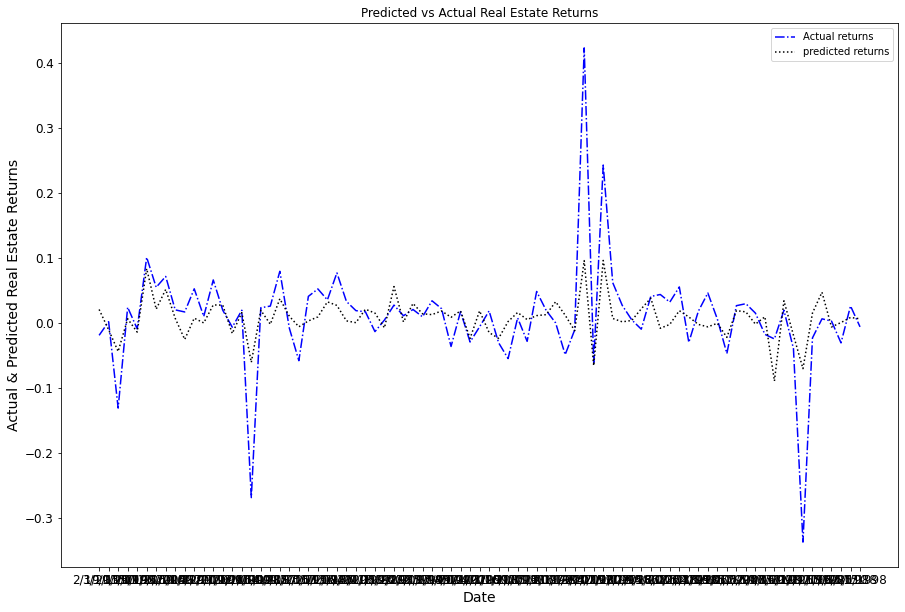

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['Real Estate'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual Real Estate Returns')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted Real Estate Returns')
plt.show()

# EVALUATE MODEL PERFORMANCE for Lasso Regression without Noise

In [ ]:
#STEP6-EVALUATE MODEL PERFORMANCE
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.035

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.0039

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02454

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(lassoReg.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

40.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(lassoReg.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

37.0

In [ ]:
print(lassoReg.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoReg.coef_})

[0.10343095 0.2047671  0.27974597 0.02596051 0.011845  ]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

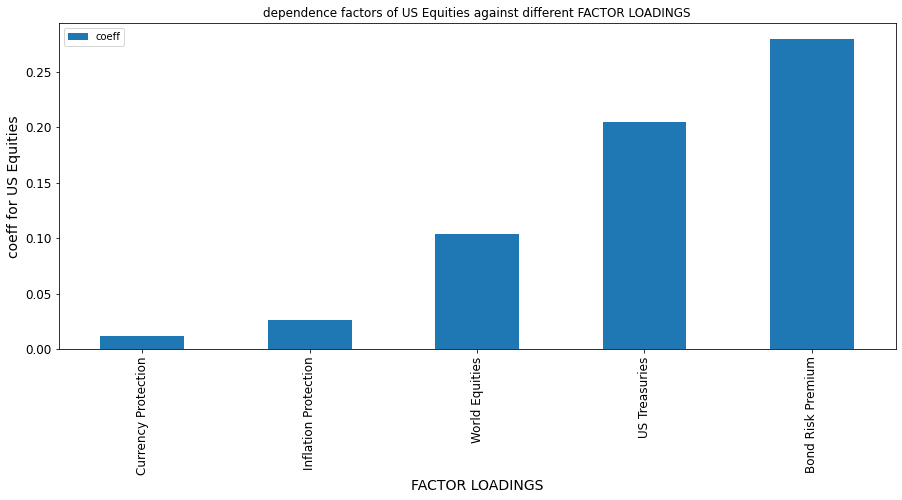

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

# lassoReg.coef_ for Lasso Regression without Noise

In [ ]:
df_m

,features,coeff
4,Currency Protection,0.011845
3,Inflation Protection,0.025961
0,World Equities,0.103431
1,US Treasuries,0.204767
2,Bond Risk Premium,0.279746


In [ ]:
from sklearn.model_selection import GridSearchCV
maxLambda1 = .25
nLambdas = 100
randomState = 7777
nFolds = 10

# CV Lasso via Scikit-learn without Noise

In [ ]:
alphaMax = maxLambda1 / (2*all_data.shape[0])
alphas = np.linspace(1e-6, alphaMax,nLambdas)
lassoTest = Lasso(random_state = randomState, fit_intercept=True)
tuned_parameters = [{'alpha': alphas}]
clf = GridSearchCV(lassoTest, tuned_parameters, cv=nFolds, refit=True)

In [ ]:
clf.fit(train_x,train_y)
lassoBest = clf.best_estimator_
alphaBest = clf.best_params_['alpha']

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=7777,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-06, 4.10749470e-06, 7.21498940e-06, 1.03224841e-05,
       1.34299788e-0...
       2.49599576e-04, 2.52707071e-04, 2.55814565e-04, 2.58922060e-04,
       2.62029555e-04, 2.65137050e-04, 2.68244544e-04, 2.71352039e-04,
       2.74459534e-04, 2.77567028e-04, 2.80674523e-04, 2.83782018e-04,
       2.86889512e-04, 2.89997007e-04, 2.93104502e-04, 2.96211997e-04,
       2.99319491e-04, 3.02426986e-04, 3.05534481e-04, 3.08641975e-04])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
lassoBest

Lasso(alpha=0.00010976231450305523, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=7777, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
alphaBest

0.00010976231450305523

In [ ]:
predicted_values=clf.predict(test_x)
predicted_values

array([ 0.02073203, -0.01019236, -0.04451281,  0.00664161, -0.01479971,
        0.08420669,  0.02073139,  0.0523    ,  0.00741524, -0.02585239,
        0.00745259, -0.00021933,  0.02773885,  0.02723137, -0.01674839,
        0.01593903, -0.0615346 ,  0.01940805, -0.0025718 ,  0.03741819,
        0.01024174, -0.00643265,  0.00287437,  0.00924642,  0.03212779,
        0.0269323 ,  0.00308578,  0.00057388,  0.02106157,  0.0147672 ,
       -0.00757718,  0.05667524,  0.00141006,  0.02961567,  0.01369604,
        0.01297557,  0.01823323,  0.00827848,  0.01849849, -0.02456711,
        0.01847804, -0.01492291, -0.02454423,  0.00180015,  0.01618145,
        0.00498453,  0.01105838,  0.0127698 ,  0.03278251,  0.01145341,
       -0.01253107,  0.09729101, -0.06699727,  0.09748243,  0.00672969,
        0.00133644,  0.00287204,  0.02171287,  0.0382055 , -0.00890477,
       -0.00238805,  0.01862904,  0.00869657, -0.00257774, -0.0065277 ,
       -0.00106301, -0.02222702,  0.01884864,  0.01717458, -0.00

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['Real Estate']-fdf['Predicted']
fdf.head(5)

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Real Estate,Predicted,Prediction_Error
361,0.709938,0.142291,0.746212,0.554271,0.520480,-0.019236,0.02073,-0.039966
62,0.294506,0.361410,0.629166,0.591221,0.399514,0.001661,-0.01019,0.011851
320,0.236217,0.717142,0.290261,0.373403,0.431131,-0.131199,-0.04451,-0.086689
92,0.510168,0.428393,0.555556,0.582014,0.555337,0.023854,0.00664,0.017214
146,0.574908,0.274209,0.584328,0.503249,0.416740,-0.009247,-0.01480,0.005553


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7924f9e890>)

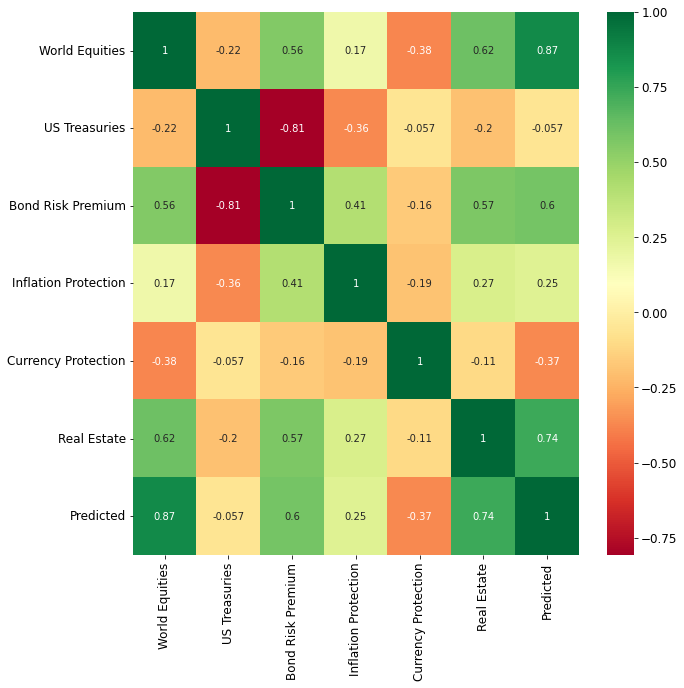

In [ ]:
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7924ebd750>)

Text(0.5, 1.0, 'Predicted vs Actual Real Estate Returns')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted Real Estate Returns')

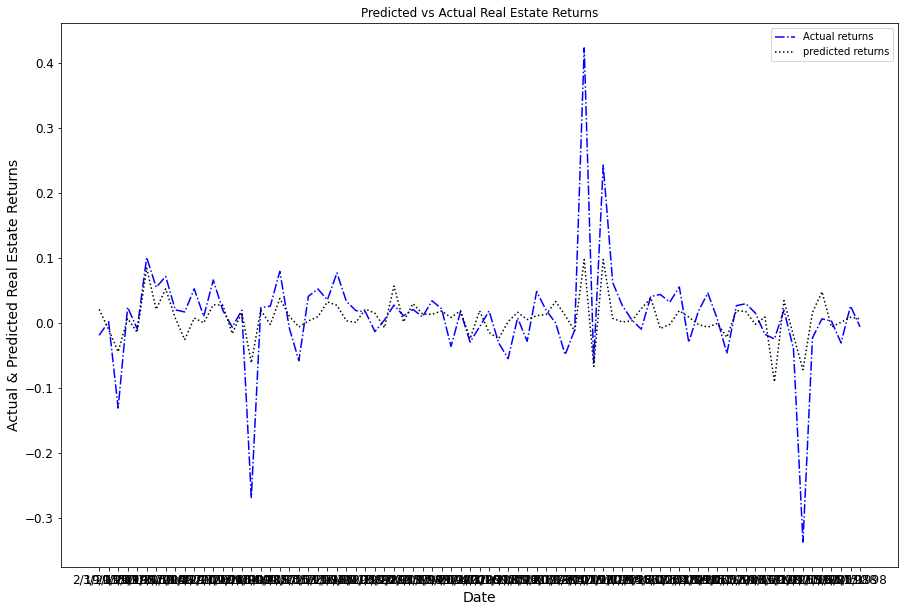

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['Real Estate'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual Real Estate Returns')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted Real Estate Returns')
plt.show()

# EVALUATE MODEL PERFORMANCE for CV Lasso without Noise

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.035

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00387

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02466

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(clf.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

41.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(clf.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

38.0

In [ ]:
print(lassoBest.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':lassoBest.coef_})

[0.10290086 0.2106395  0.2884803  0.02706586 0.01294666]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

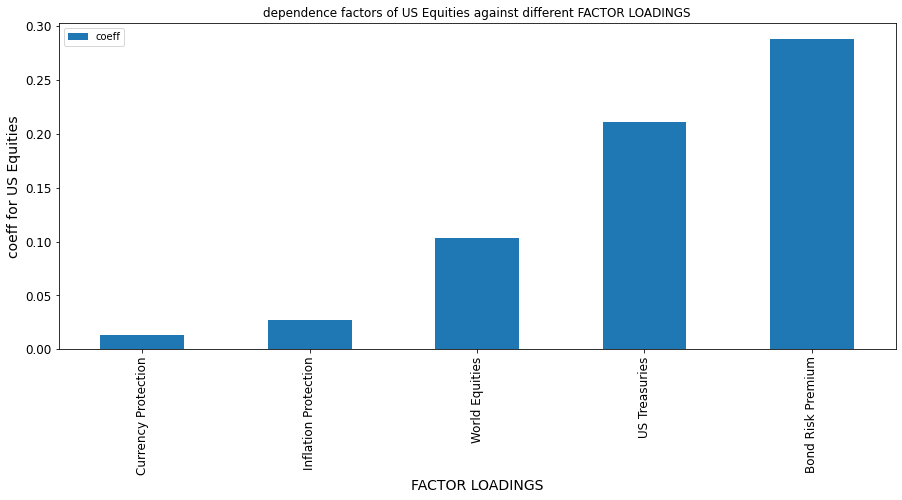

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

# CV Elastic Net Scikit-learn without Noise

In [ ]:
maxLambda= .25
maxL1Ratio = .99
nLambdas = 100
nL1Ratios = 100
randomState = 7777
nFolds = 10
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
alphaMax = maxLambda/(2*all_data.shape[0])
alphas = np.linspace(1e-6, alphaMax,nLambdas)
l1RatioMax = maxL1Ratio
l1Ratios = np.linspace(1e-6, l1RatioMax,nL1Ratios)

elasticNetTest = ElasticNet(random_state = randomState, fit_intercept=True)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1Ratios}]

clf = GridSearchCV(elasticNetTest, tuned_parameters, cv=nFolds, refit=True)  

In [ ]:
clf.fit(train_x,train_y)
elasticNetBest = clf.best_estimator_
alphaBest = clf.best_params_['alpha']
l1RatioBest = clf.best_params_['l1_ratio']

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=7777, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': array([1.00000000e-06, 4.10749470e-06, 7.21498940e-06, 1.03224841...
       8.00000192e-01, 8.10000182e-01, 8.20000172e-01, 8.30000162e-01,
       8.40000152e-01, 8.50000141e-01, 8.60000131e-01, 8.70000121e-01,
       8.80000111e-01, 8.90000101e-01, 9.00000091e-01, 9.10000081e-01,
       9.20000071e-01, 9.30000061e-01, 9.40000051e-01, 9.50000040e-01,
       9.60000030e-01, 9.70000020e-01, 9.80000010e-01, 9.90000000e-01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [ ]:
print('best lambda1 = ' + str(alphaBest*2*all_data.shape[0]*l1RatioBest))
print('best lambda2 = ' + str(all_data.shape[0]*alphaBest*(1-l1RatioBest)))

best lambda1 = 0.03750021212121212
best lambda2 = 0.10624989393939394


In [ ]:
predicted_values=clf.predict(test_x)
predicted_values

array([ 0.02119237, -0.01158809, -0.04492995,  0.00760775, -0.01467879,
        0.08466886,  0.02070059,  0.05152512,  0.00838989, -0.02566139,
        0.00618589, -0.00058721,  0.02748431,  0.02728812, -0.01614704,
        0.01676733, -0.06317862,  0.01948902, -0.00371272,  0.03831532,
        0.01103706, -0.0069014 ,  0.00256919,  0.00992353,  0.03179443,
        0.02811298,  0.00377965,  0.00108328,  0.02190997,  0.0157111 ,
       -0.00820032,  0.05726988,  0.00154175,  0.03010284,  0.01346555,
        0.01307298,  0.01769059,  0.00784208,  0.01795827, -0.0237849 ,
        0.01614964, -0.01492424, -0.02401748,  0.00145932,  0.01503118,
        0.00534137,  0.00991125,  0.0125658 ,  0.03523242,  0.01098902,
       -0.0116507 ,  0.09850952, -0.06660538,  0.09374397,  0.00677258,
        0.00140897,  0.00230827,  0.02168487,  0.03749595, -0.00840334,
       -0.0023807 ,  0.01793424,  0.0088887 , -0.00350199, -0.00673622,
       -0.00119101, -0.02292703,  0.01920228,  0.01674921, -0.00

In [ ]:
#INVERSE SCALING TO REVERT BACK TO SAME SCALE
df1=pd.DataFrame(scld.inverse_transform(x_scld),columns=x.columns)
df1.head()
x.head()

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection
0,0.028511,0.031500,0.006408,-0.016265,0.030292
1,-0.009204,-0.044692,0.057381,0.006362,0.010258
2,0.075134,0.028719,-0.024396,-0.002848,-0.020739
3,-0.002459,0.023084,-0.004869,0.003089,0.008187
4,0.040245,0.086780,-0.044417,0.004077,-0.002219


In [ ]:
#In the last step we are appending the predicted house prices into 
#the original data and computing the error in estimation for the test data.
fdf=pd.concat([test_x,test_y],1)

In [ ]:
fdf['Predicted']=np.round(predicted_values,5)
fdf['Prediction_Error']=fdf['Real Estate']-fdf['Predicted']
fdf.head(5)

,World Equities,US Treasuries,Bond Risk Premium,Inflation Protection,Currency Protection,Real Estate,Predicted,Date,Prediction_Error
361,0.709938,0.142291,0.746212,0.554271,0.520480,-0.019236,0.02119,2/1/2015,-0.040426
62,0.294506,0.361410,0.629166,0.591221,0.399514,0.001661,-0.01159,3/1/1990,0.013251
320,0.236217,0.717142,0.290261,0.373403,0.431131,-0.131199,-0.04493,9/1/2011,-0.086269
92,0.510168,0.428393,0.555556,0.582014,0.555337,0.023854,0.00761,9/1/1992,0.016244
146,0.574908,0.274209,0.584328,0.503249,0.416740,-0.009247,-0.01468,3/1/1997,0.005433


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7924cedd10>)

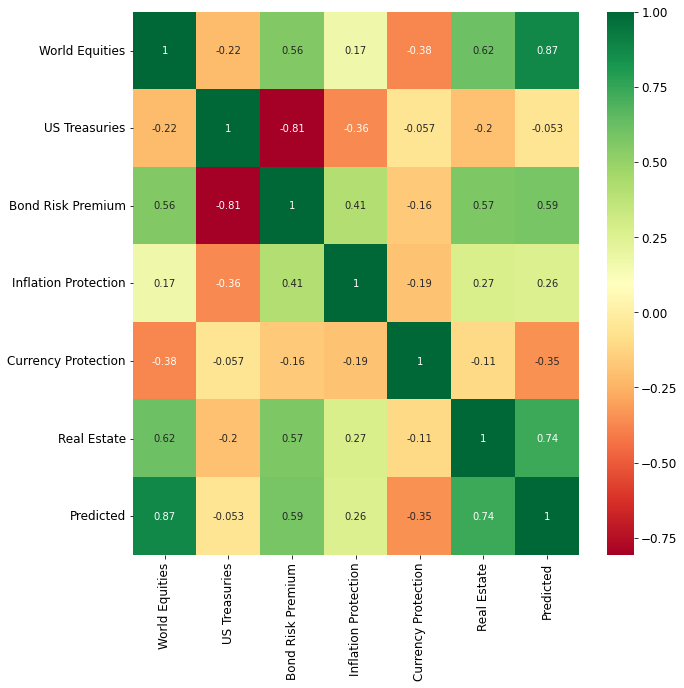

In [ ]:
plt.subplots(figsize=(10,10))
df1=fdf.drop(['Prediction_Error'],axis=1)
sns.heatmap(df1.corr(),cmap='RdYlGn',annot=True)
plt.show()

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f791ff73450>)

Text(0.5, 1.0, 'Predicted vs Actual Real Estate Returns')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Actual & Predicted Real Estate Returns')

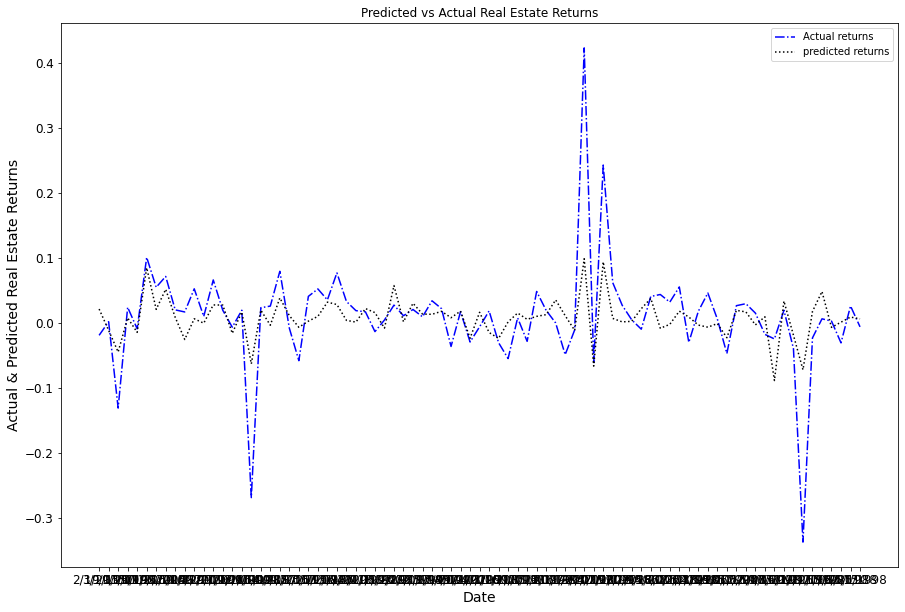

In [ ]:
fdf['Date']=all_data['Date']
plt.subplots(figsize=(15,10))
plt.plot(fdf['Date'],fdf['Real Estate'], label = "Actual returns", linestyle="-.",color = 'blue')
plt.plot(fdf['Date'],fdf['Predicted'], label = "predicted returns", linestyle=":",color = 'black')
plt.legend()
plt.title('Predicted vs Actual Real Estate Returns')
plt.xlabel('Date')
plt.ylabel('Actual & Predicted Real Estate Returns')
plt.show()

# EVALUATE MODEL PERFORMANCE for CV Elastic Net without Noise

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(mean_absolute_error(predicted_values,test_y),3)

MEAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.035

In [ ]:
from sklearn import metrics
print("MEAN SQUARE ERROR (MSE) FOR TEST DATA IS")
np.round(metrics.mean_squared_error(test_y,predicted_values),5)

MEAN SQUARE ERROR (MSE) FOR TEST DATA IS


0.00386

In [ ]:
from sklearn.metrics import median_absolute_error
print("MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS")
round(median_absolute_error(predicted_values,test_y),5)

MEDIAN ABSOLUTE ERROR (MAE) FOR TEST DATA IS


0.02233

In [ ]:
"R-SQUARE VALUE FOR TEST DATA IS"
np.round(clf.score(test_x,test_y)*100,0)

'R-SQUARE VALUE FOR TEST DATA IS'

41.0

In [ ]:
"R-SQUARE VALUE FOR TRAIN DATA IS"
np.round(clf.score(train_x,train_y)*100,0)

'R-SQUARE VALUE FOR TRAIN DATA IS'

38.0

In [ ]:
print(elasticNetBest.coef_)
df_m=pd.DataFrame({'features':x.columns,'coeff':elasticNetBest.coef_})

[0.10770804 0.20873327 0.27974047 0.03257326 0.01846693]


In [ ]:
df_m=df_m.sort_values(by=['coeff'])

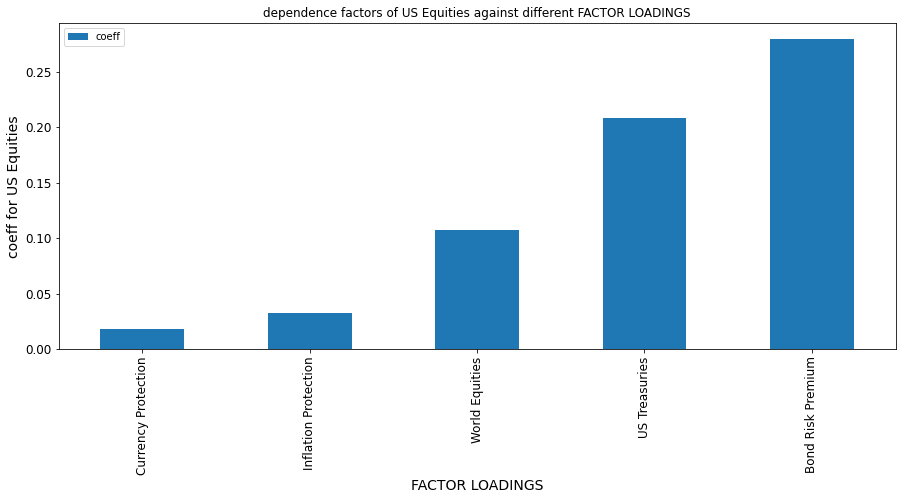

In [ ]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,6))
plt.title('dependence factors of US Equities against different FACTOR LOADINGS')
plt.xlabel('FACTOR LOADINGS')
plt.ylabel('coeff for US Equities')
plt.show();

In [ ]:
!jupyter nbconvert FACTOR_MODELS_ANALYSIS_PREDICTION.ipynb

[NbConvertApp] Converting notebook FACTOR_MODELS_ANALYSIS_PREDICTION.ipynb to html
[NbConvertApp] Writing 1244083 bytes to FACTOR_MODELS_ANALYSIS_PREDICTION.html
